**B) Apply pyOD**

In [ ]:
pip install pyod

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.abod import ABOD
from pyod.models.cof import COF
from pyod.models.knn import KNN
from sklearn.metrics import  precision_score, recall_score, f1_score,accuracy_score

In [ ]:
data = pd.read_csv('creditcardfraud_normalised.csv')
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [ ]:
print(f"Dataset shape: {data.shape}")
print(f"Number of features: {data.shape[1] - 1}")
print("\nDataset information:")
print(data.info())

Dataset shape: (284807, 30)
Number of features: 29

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     28480

In [ ]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

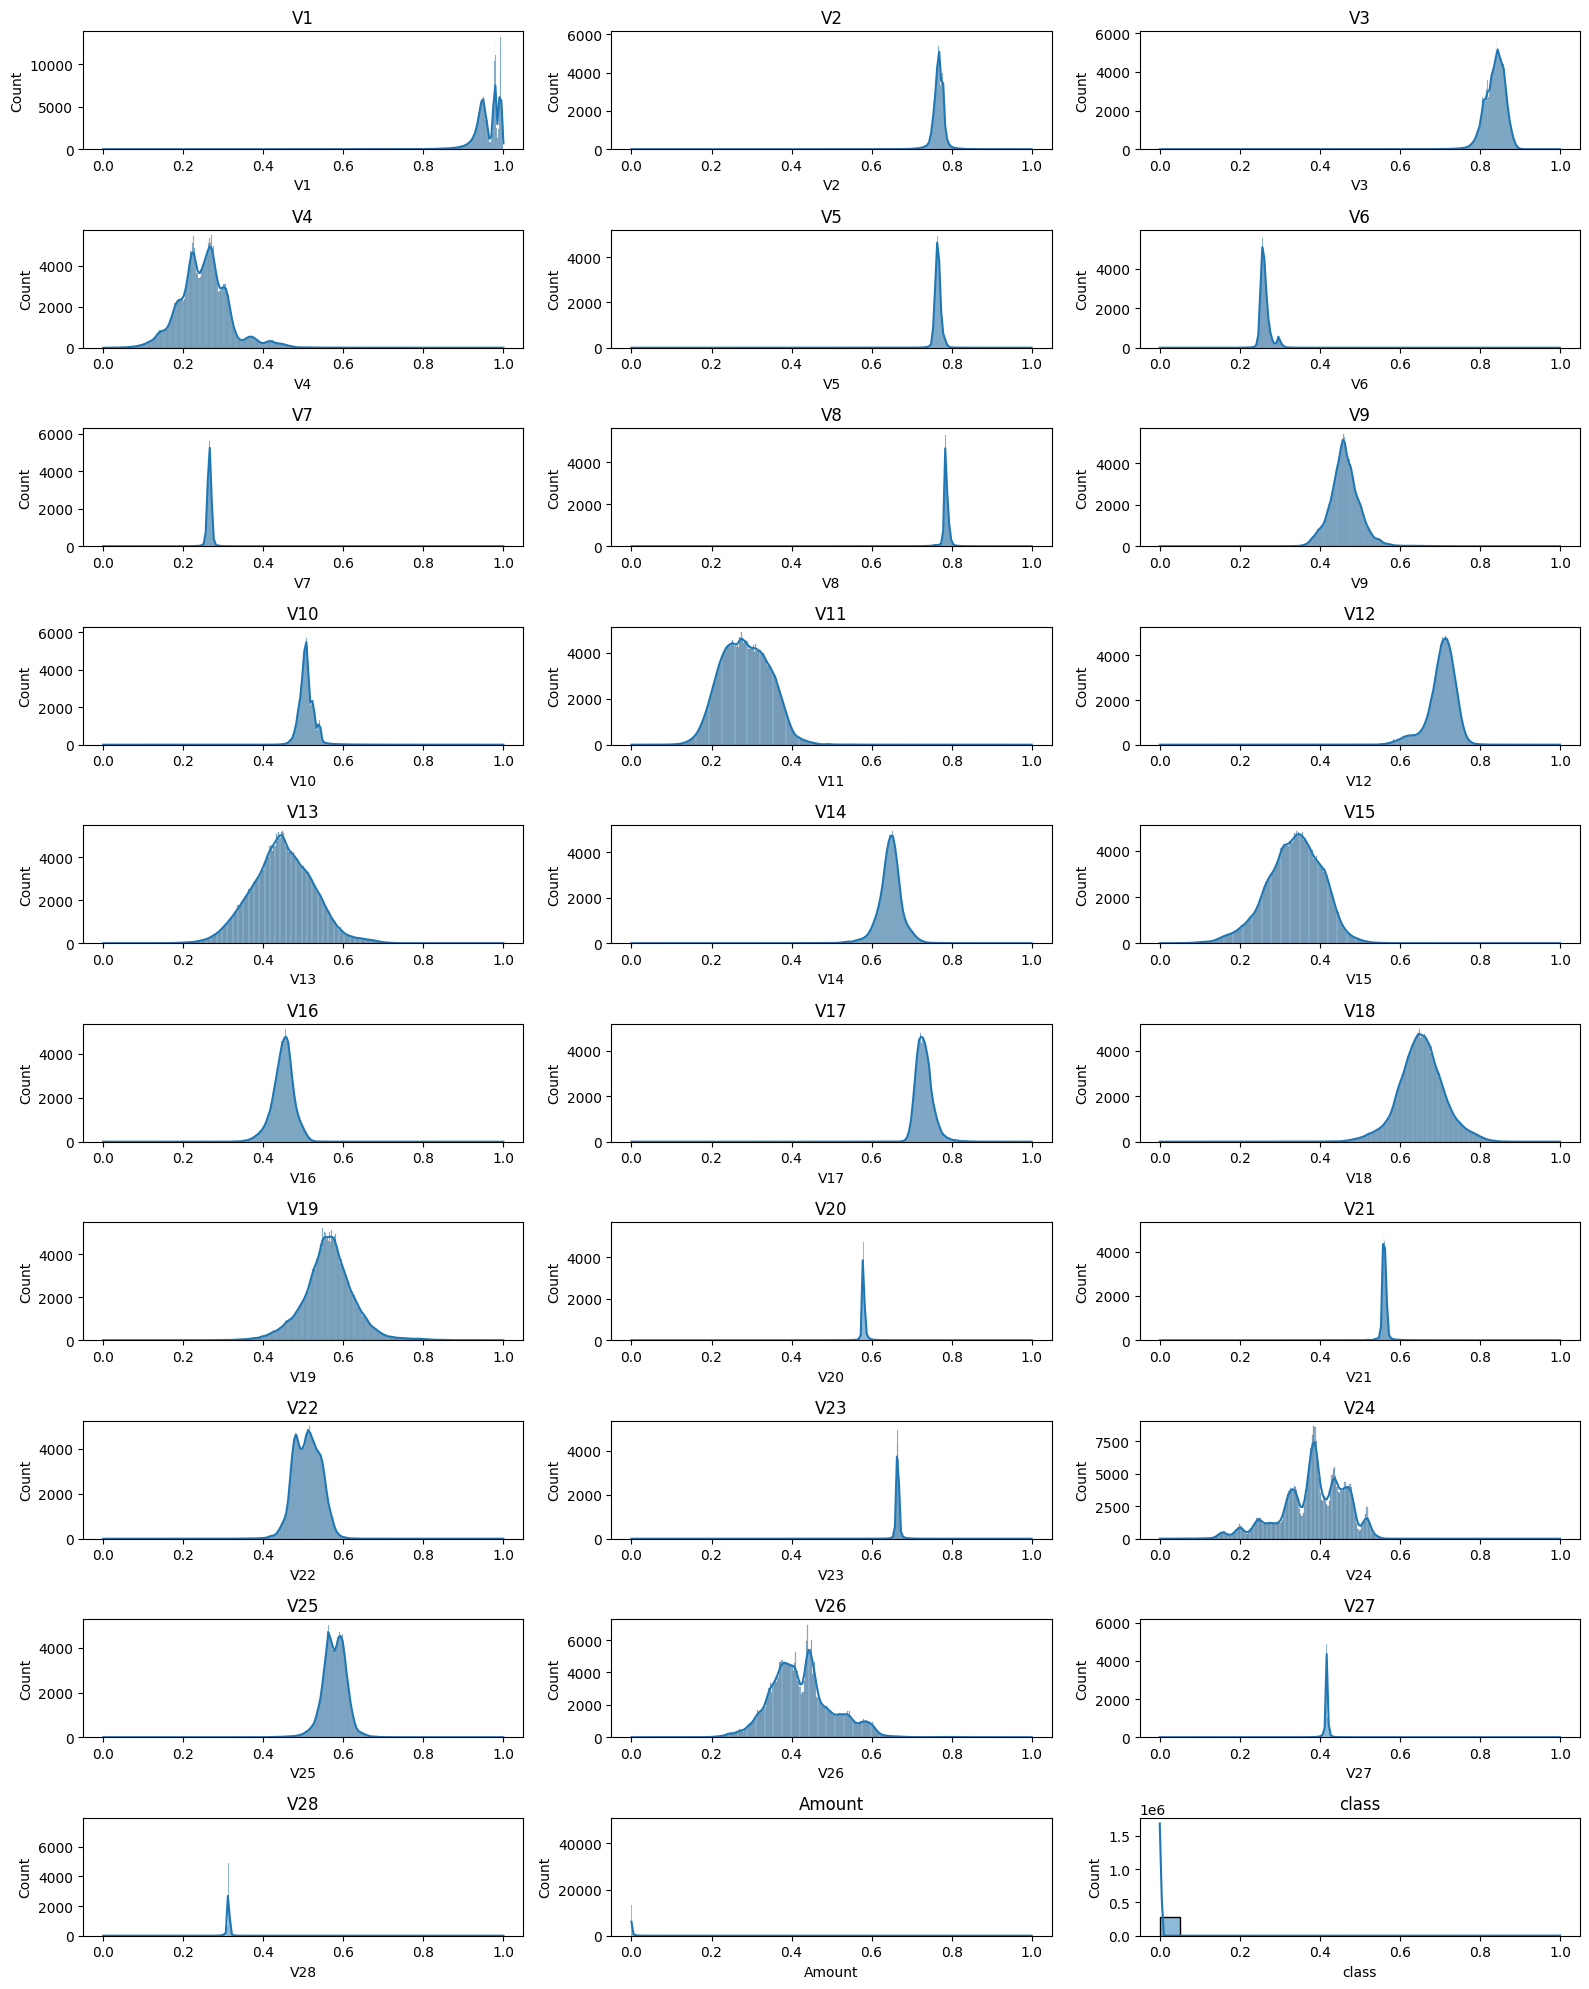

In [ ]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(data.columns):
    plt.subplot(10, 3, i + 1)
    plt.title(col)
    sns.histplot(data[col], kde=True)
plt.tight_layout()
plt.show()


In [ ]:
# use sample of the dataset

positive = data[data["class"]== 1]
negative = data[data["class"]== 0]


print("positive:{}".format(len(positive)))
print("negative:{}".format(len(negative)))

new_data = pd.concat([positive,negative[:10000]])

#shuffling our dataset
new_data = new_data.sample(frac=1,random_state=42)


new_data.shape

positive:492
negative:284315


(10492, 30)

In [ ]:
X = new_data.drop(['class'], axis=1)
y = new_data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=42 )

abod = ABOD()
cof = COF()
knn = KNN()


abod.fit(X_train)
cof.fit(X_train)
knn.fit(X_train)

# abod_scores = abod.decision_function(X_test)
# cof_scores = cof.decision_function(X_test)
# knn_scores = knn.decision_function(X_test)


In [ ]:
# Get the prediction labels of the training data
y_train_pred = knn.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = knn.decision_scores_
y_test_pred = knn.predict(X_test)
# Evaluate on the training data
evaluate_print('KNN', y_train, y_train_scores)

y_train_scores.shape

KNN ROC:0.9363, precision @ rank n:0.6041


(8393,)

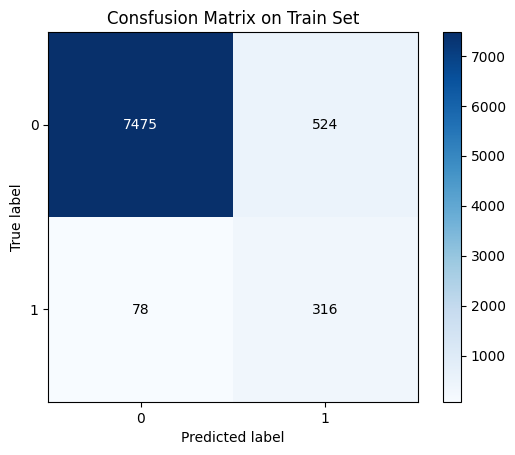

0.9282735613010842


In [ ]:
import scikitplot as skplt

# plot the comfusion matrix  in the train set

skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False,title="Consfusion Matrix on Train Set")
plt.show()

print(accuracy_score(y_train,y_train_pred))
# visualize('KNN',X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

In [ ]:
y_test_scores = knn.decision_function(X_test)  # outlier scores

# Evaluate on the training data
evaluate_print('KNN', y_test,y_test_scores)

KNN ROC:0.9307, precision @ rank n:0.5918


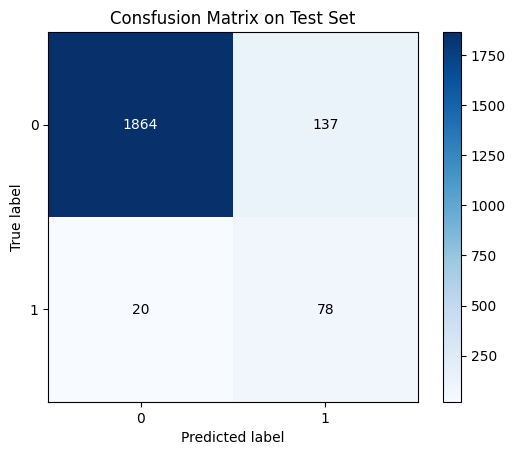

0.9252024773701762


In [ ]:
# plot the comfusion matrix  in the test set
y_preds = knn.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test,y_preds, normalize=False,title="Consfusion Matrix on Test Set"  )
plt.show()
print(accuracy_score(y_test,y_preds))


COF ROC:0.4053, precision @ rank n:0.0254


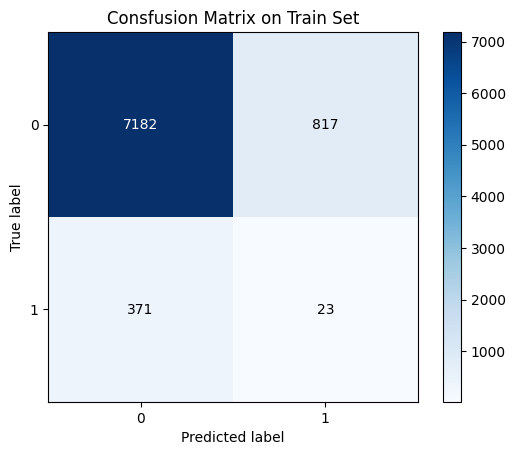

0.8584534731323722
COF ROC:0.5282, precision @ rank n:0.0612


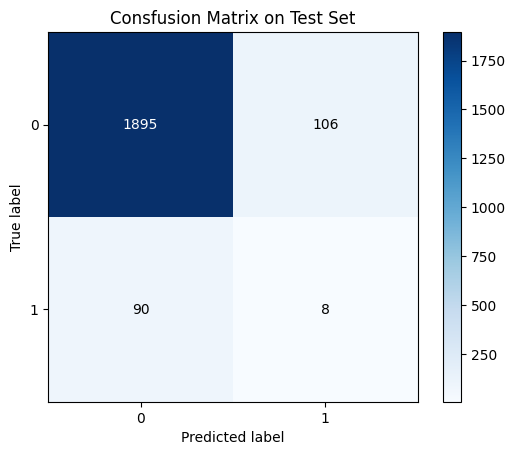

0.9066222010481182


In [ ]:
# Get the prediction labels of the training data
y_train_pred = cof.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = cof.decision_scores_
y_test_pred = cof.predict(X_test)
# Evaluate on the training data
evaluate_print('COF', y_train, y_train_scores)




import scikitplot as skplt

# plot the comfusion matrix  in the train set

skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False,title="Consfusion Matrix on Train Set")
plt.show()

print(accuracy_score(y_train,y_train_pred))


y_test_scores = cof.decision_function(X_test)  # outlier scores

# Evaluate on the training data
evaluate_print('COF', y_test,y_test_scores)



# plot the comfusion matrix  in the test set
y_preds = cof.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test,y_preds, normalize=False,title="Consfusion Matrix on Test Set"  )
plt.show()
print(accuracy_score(y_test,y_preds))
